# Trabalho 2 - Operações de Vizinhança

## 1) Sobel e Roberts

### Preâmbulo

Neste primeiro item do trabalho será implementado e aplicado um filtro de detecção de borda através de uma operação de convolução.

Para o tratamento das bordas foi utilizada a reflexão, conforme cv.BORDER_REFLECT da OpenCV.
https://docs.opencv.org/3.4.1/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5

Neste trabalho foram utilizados dois filtros de borda com direção pré-determinada.
Inicialmente é aplicada a operação de borda utilizando o operador de Sobel em x e em y.

Sobel:

$$ \frac{\delta f}{\delta x} =
\begin{vmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{vmatrix}
$$

$$ \frac{\delta f}{\delta y} =
\begin{vmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{vmatrix}
$$

Roberts:

$$
\begin{vmatrix}
-1 & 0 \\
0 & 1
\end{vmatrix}
$$

$$
\begin{vmatrix}
0 & -1 \\
1 & 0
\end{vmatrix}
$$

O filtro de Roberts tem largura de janela par, para fazer a implementação deste foi feita uma adaptação na matriz adicionando uma coluna e linha com valor zero.
Esta facilita a utilização do filtro pois permite que a mesma implementação seja capaz de utilizar ambos os filtros apenas intercambiando a matriz de vizinhança.

$$
\begin{vmatrix}
-1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{vmatrix}
$$

$$
\begin{vmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0
\end{vmatrix}
$$

### Código

O código, apresentado a seguir, é separado nos métodos:
* show_image apenas para exibir a imagem na tela;
* reflect_index trata os valores para a borda;
* soma_imagens soma duas imagens, para reunir filtros x e y;
* operacao_vizinhanca aplica uma operação de convolução a uma imagem.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

np.seterr(all='raise')


def show_image(img, title=''):
	plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
	plt.title(title)
	plt.show()


def reflect_index(x, size):
	x = -x - 1 if x < 0 else x
	x = size - (x % size) - 1 if x >= size else x
	return x


def soma_imagens(imgs, min_value=0, max_value=255):
	Imx = imgs[0].shape[0]
	Imy = imgs[0].shape[1]
	resp = np.zeros(imgs[0].shape[:2])
	for x in range(Imx):
		for y in range(Imy):
			resp[x, y] = max(min_value, min(int(imgs[0][x, y]) + imgs[1][x, y], max_value))
	return np.uint8(resp)


def operacao_vizinhanca(img, neigh, min_value=0, max_value=255):
	'''
	Usando BORDER_REFLECT.
	:param img: Imagem.
	:param neigh: Filtro.
	:param min_value: Valor mínimo.
	:param max_value: Valor máximo.
	:return: Imagem resultante da aplicação da operação.
	'''
	resp = np.zeros(img.shape[:2])
	Imx = img.shape[0]
	Imy = img.shape[1]

	Nx = neigh.shape[0]
	Ny = neigh.shape[1]
	if Nx % 2 != Ny % 2:
		raise ValueError("A vizinhança não pode ter uma coordenada de tamanho impar e outra par")

	if Nx % 2 == 0:
		temp = np.zeros([neigh.shape[0] + 1, neigh.shape[1] + 1])
		for i in range(Nx):
			for j in range(Ny):
				temp[i, j] = neigh[i, j]
		Nx = neigh.shape[0]
		Ny = neigh.shape[1]
		neigh = temp

	for x in range(Imx):
		for y in range(Imy):
			# print(f"({x},{y})")
			value = 0
			for i in range(Nx):
				for j in range(Ny):
					_x = reflect_index(x - Nx // 2 + i, Imx)
					_y = reflect_index(y - Ny // 2 + j, Imy)
					value += img[_x, _y] * neigh[i, j]
			resp[x, y] = max(min_value, min(value, max_value))

	return np.uint8(resp)


sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

roberts_y = np.array([[-1, 0], [0, 1]])
roberts_x = np.array([[0, -1], [1, 0]])

file_name = "Lenna_(test_image).png"
lenna_img = cv2.imread(file_name, 0)

to_show = []
to_show += [(lenna_img, 'Lenna Original')]
print(f"{to_show[-1][1]}")
to_show += [(operacao_vizinhanca(lenna_img, sobel_x), 'Lenna Sobel X')]
print(f"{to_show[-1][1]}")
to_show += [(operacao_vizinhanca(lenna_img, sobel_y), 'Lenna Sobel Y')]
print(f"{to_show[-1][1]}")
to_show += [(soma_imagens([to_show[-1][0], to_show[-2][0]]), 'Lenna Sobel X + Y')]
print(f"{to_show[-1][1]}")
to_show += [(operacao_vizinhanca(lenna_img, roberts_x), 'Lenna Roberts X')]
print(f"{to_show[-1][1]}")
to_show += [(operacao_vizinhanca(lenna_img, roberts_y), 'Lenna Roberts Y')]
print(f"{to_show[-1][1]}")
to_show += [(soma_imagens([to_show[-1][0], to_show[-2][0]]), 'Lenna Roberts X + Y')]
print(f"{to_show[-1][1]}")

#for x in to_show:
#	show_image(x[0], x[1])

Lenna Original
Lenna Sobel X
Lenna Sobel Y
Lenna Sobel X + Y
Lenna Roberts X
Lenna Roberts Y
Lenna Roberts X + Y


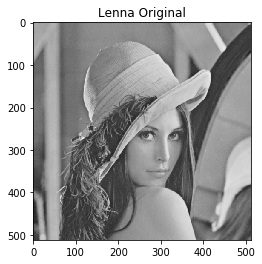

In [2]:
show_image(to_show[0][0], to_show[0][1])

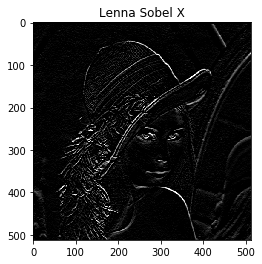

In [3]:
show_image(to_show[1][0], to_show[1][1])

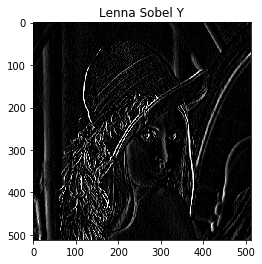

In [4]:
show_image(to_show[2][0], to_show[2][1])

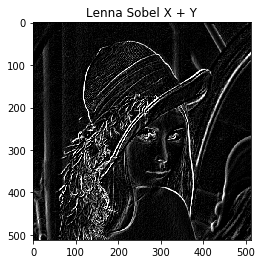

In [5]:
show_image(to_show[3][0], to_show[3][1])

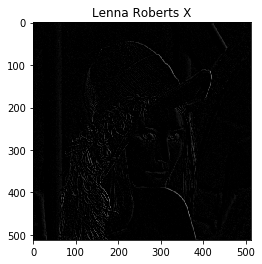

In [6]:
show_image(to_show[4][0], to_show[4][1])

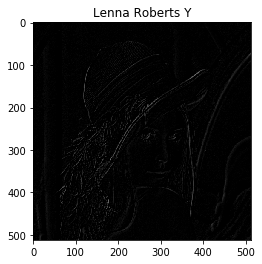

In [7]:
show_image(to_show[5][0], to_show[5][1])

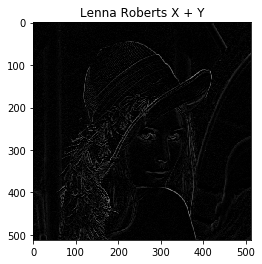

In [8]:
show_image(to_show[6][0], to_show[6][1])

### Resultados

Para os testes foi utilizada a foto da Lenna, um arquivo padrão para testes em processamento digital de imagens, os filtros foram aplicados apenas para a camada de luminância da imagem, desconsiderando os canais de cor.

Pode-se se ver que a aplicação do filtro de Sobel na direção x destaca bastante as bordas horizontais, ao passo que o mesmo na direção y dá mais destaque para aquelas na direção vertical.

Ao analisarmos os resultados da aplicação do filtro do Roberts, vemos que as bordas são destacadas conforme acontece no filtro anterior, contudo de maneira bem mais sutil.

Também foi dado destaque a soma do resultado da detecção de bordas em ambas as direções (x, y), esta operação pode ser útil quando se tem interesse em todas as bordas independente de direção.

### Discussão

Ao comparar os resultados obtidos pela aplicação dos filtros de Sobel e de Roberts pode-se perceber que o filtro de Sobel detecta muito mais bordas, para o caso do filtro de Roberts as bordas detectadas são aquelas bem mais evidentes na imagem original.

Nota-se que tanto nas detecções de borda para as direções x e y separadas quanto para a soma o resultado encontrado pelo filtro de Sobel apresenta muito mais bordas detectadas.

## 2) Filtros passa baixa 3x3 e 7x7

### Preâmbulo

Consideremos agora o suporte geométrico representado por $f(x, y)$ descrito a seguir:

$$
f(x, y) = 
\begin{vmatrix}
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\ 
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\  
0& 0& 0& 0& 0& 0& 0&  0& 0& 0& 255& 255& 255& 255& 255& 255& 255& 255& 255& 255\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0&\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0\\
255& 255& 255& 255& 255& 255& 255& 255& 255& 255& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0
\end{vmatrix}
$$

Serão utilizados os filtros passa baixa a seguir 3x3 e 7x7, conforme:

$$
\begin{vmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} 
\end{vmatrix}
$$

$$
\begin{vmatrix}
\frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} \\
\frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} \\
\frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} \\
\frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} \\
\frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} \\
\frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} \\
\frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} & \frac{1}{49} \\
\end{vmatrix}
$$

### Código

O código utiliza os métodos já apresentados para o exercício anterior e agora apenas define a imagem que representa $f(x, y)$, cria os filtros e utiliza os métodos já apresentados para aplicar estes à imagem.

In [9]:
image = np.array([
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


def passa_baixa(size):
	return np.array([[1.0 / (size ** 2)] * size] * size)


def show_image(img, title=''):
	plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
	plt.title(title)
	plt.show()

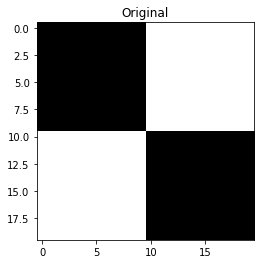

In [10]:
show_image(image, 'Original')

Passa baixa 3x3.

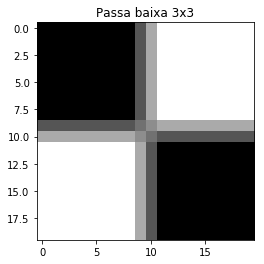

In [11]:
show_image(operacao_vizinhanca(image, passa_baixa(3)), 'Passa baixa 3x3')

Passa baixa 7x7.

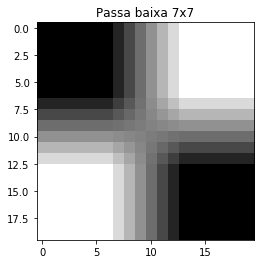

In [12]:
show_image(operacao_vizinhanca(image, passa_baixa(7)), 'Passa baixa 7x7')

## 3) Novos filtros

a) Filtro Norte

$$
\begin{vmatrix}
1 & 1 & 1 \\
1 & -2 & 1 \\
-1 & -1 & -1
\end{vmatrix}
$$

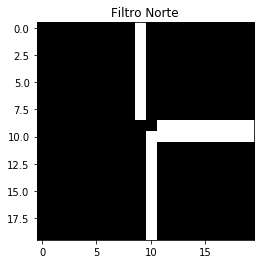

In [13]:
filtro_a_norte = np.array([[1, 1, 1], [1, -2, 1], [-1, -1, -1]])
show_image(operacao_vizinhanca(image, filtro_a_norte), 'Filtro Norte')

b) Filtro Sul

$$
\begin{vmatrix}
-1 & -1 & -1 \\
1 & -2 & 1 \\
1 & 1 & 1
\end{vmatrix}
$$

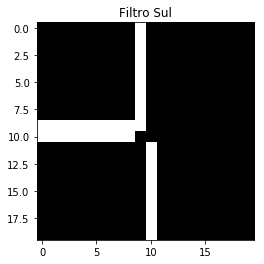

In [14]:
filtro_b_sul = np.array([[-1, -1, -1], [1, -2, 1], [1, 1, 1]])
show_image(operacao_vizinhanca(image, filtro_b_sul), "Filtro Sul")

c) Filtro Leste

$$
\begin{vmatrix}
-1 & 1 & 1 \\
-1 & -2 & 1 \\
-1 & 1 & 1
\end{vmatrix}
$$

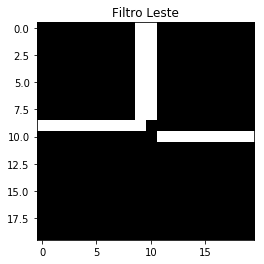

In [15]:
filtro_c_leste = np.array([[-1, 1, 1], [-1, -2, 1], [-1, 1, 1]])
show_image(operacao_vizinhanca(image, filtro_c_leste), 'Filtro Leste')

d) Filtro Sudeste

$$
\begin{vmatrix}
-1 & -1 & 1 \\
-1 & -2 & 1 \\
1 & 1 & -1
\end{vmatrix}
$$

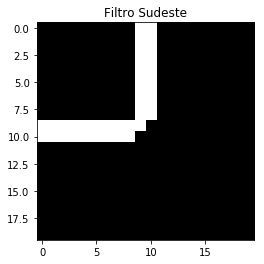

In [16]:
filtro_d_sudeste = np.array([[-1, -1, 1], [-1, -2, 1], [1, 1, 1]])
show_image(operacao_vizinhanca(image, filtro_d_sudeste), 'Filtro Sudeste')

### Resultados

Conforme podemos ver nos resultados, os filtros passa-baixa suavizam a imagem, dando um aspecto de borramento, este tipo de filtro pode ser usado para atenuar altas frequências.
Podemos ver que a diferença do passa baixa 3x3 para o 7x7 é a quantidade de pontos do suporte geométrico que é utilizado na operação, resultando assim numa área de borramento proporcional ao tamanho da janela do filtro.

Os filtros Norte, Sul, Leste e Sudeste são filtros de detecção de borda que atuam na identificação de bordas nas suas respectivas direções.

### Discussão

Os filtros passa-baixa podem ser usados para suavizar imagens ao tornar as transições menos abruptas.

Nota-se que os filtros Norte e Sul identificam melhor as bordas verticais que as horizontais, ao passo que o equivalente ocorre para o filtro Leste, que detecta melhor bordas horizontais.

Para o caso do filtro Sudeste é interessante notar que este detecta as bordas com mais ênfase no quadrante superior esquerdo, que representa a posição (Nordeste) da imagem.